# Tarea 9
## Francisco Ricardo Torres Arvizu


La idea detrás de las diferencias finitas es la de aproximar la derivada de una función $f$ en un punto $x_0$. En primer lugar, recordamos la definición de la derivada: $$
f'(x) = \lim_{h\to0}\frac{f(x+h)-f(x)}{h}.
$$
La derivada numérica hacia adelante se define simplemente sustituyendo el límite por valores pequeños de $h$, digamos $0.1$ o $0.01$ típicamente.

Se copia la función de derivada numérica para hacer el ejercicio 1

In [1]:
function derivadanumerica(f::Function,x0,h)
    df(x)=(f(x+h)-f(x))*(1/h)
    dfv=df(x0)
    
    return dfv
end


derivadanumerica (generic function with 1 method)

In [2]:
derivadanumerica(x->x^2,1,0.0000001)

2.0000001010878066


### Ejercicio 2. 
Utiliza tu función derivadaNumerica para calcular la derivada de la función $\cos$ en un punto $x_0\in[0,1)$. Compara tu resultado con el que indica el cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$. Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$: $$\epsilon=\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)},$$ respecto a $h$.

## El punto que use para hacer el análisis en los ejercios 2, 4 fue $ \pi/4$

### Solución 
Se crea una función que nos entregue la derivada exacta usando SymPy 

In [3]:
Pkg.add("SymPy")

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [4]:
using SymPy

In [5]:
A,x,a,n,m=symbols("A,x,a,n,m")

(A, x, a, n, m)

  likely near /opt/julia_packages/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.6/IJulia/src/kernel.jl:31
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl


In [6]:
function dif(f::Function)

 
    df= diff(f(x),x)

return df
end 

dif (generic function with 1 method)

Luego se construye una función que compare la dervada numérica con la real usando el error propuesto.

In [7]:
function derivadanumericavsreal(f::Function,x0,h)
    df2=derivadanumerica(f,x0,h)
    dfr=dif(f)
    dfj=lambdify( dfr,[x]);
    epsilon=abs((df2-dfj(x0))*(1/dfj(x0)))
    return epsilon
end


derivadanumericavsreal (generic function with 1 method)

Se crea otra función que grafique estos puntos con respecto a h

In [8]:
function creadoradeyk(f::Function,x0)
    yk=[]
    hs=linspace(0.001,0.1,100)
    g=0.0         
    for i in 1:100
      h=hs[i]
         g=abs(derivadanumericavsreal(f,x0,h))
        
        
        push!(yk,g)
    end
    return yk
end

creadoradeyk (generic function with 1 method)

In [9]:
using PyPlot

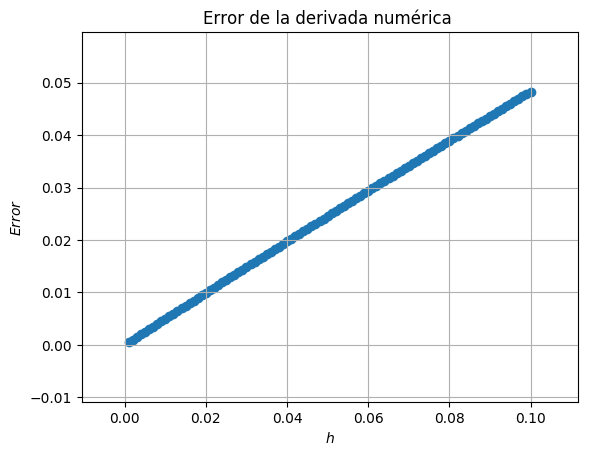

  likely near In[10]:1
  likely near In[10]:1
  likely near In[10]:1
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl


PyObject <matplotlib.text.Text object at 0x7fe3e5700b90>

In [10]:
scatter(linspace(0.001,0.1,100),creadoradeyk(x->cos(x),pi/4))
grid()
title("Error de la derivada numérica ")
ylabel(L"Error")
xlabel(L"h")

Se usa otra función para ver la convergencia de la derivada y el error con respecto a $\frac{1}{h}$.

In [11]:
using SymPy
using PyPlot
plt = PyPlot

function creadoradeyk2(f::Function,x0)
    yk=[]
    xk=[]
    hs=linspace(0.001,0.1,100)
    g=0.0  
    der=[]
    d=0.0
    vr=[]
    for i in 1:100
      h=hs[i]
        h2=1/h
        push!(vr,-0.7071067811865475)
         g=abs(derivadanumericavsreal(f,x0,h))
        d=derivadanumerica(f,x0,h)
        push!(yk,g)
         push!(der,d)
         push!(xk,h2)
    end
    
    plt.grid()
  plt.plot(vr,color="red",label="Valor real derivada") 
    plt.scatter(xk,der,color = "violet",label = "Derivada ")
plt.xlabel("1/h")
    plt.title("Connvergencia de derivada y error")
    plt.scatter(xk,yk,color = "pink",label = "Error")
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    plt.show()
   
end

creadoradeyk2 (generic function with 1 method)

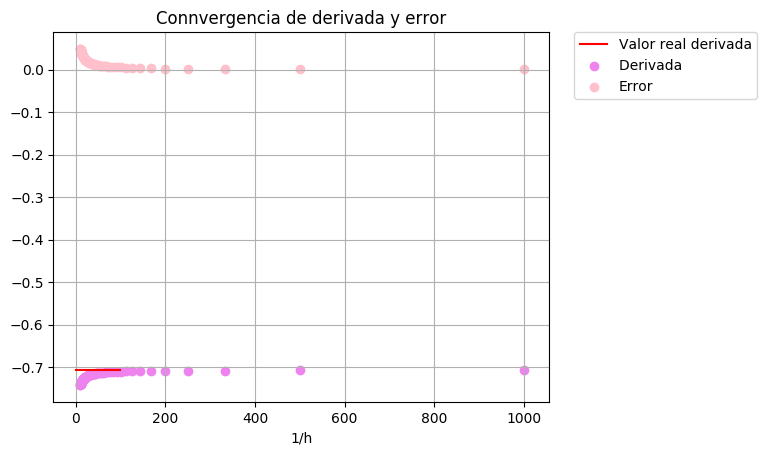

In [12]:
creadoradeyk2(x->cos(x),pi/4)

### Ejercicio 3.
Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe alguna forma de mejorar el cálculo de la derivada numérica? Comenta.
Tip: ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series?
  
  
  Nota: Entregar en $\LaTeX$ en el notebook de la tarea.
Respecto al ejercicio anterior, en clase se demostró que para mejorar la convergencia del error es conveniente usar la derivada simétrica, en clase demostramos que: $$\frac{f(x+h)-f(x-h)}{2h}-f'(x)=\mathcal{O}(h^2),$$ claramente el error converge mas rápido que con la derivada hacia adelante. La razón del ejercicio 2 y su equivalente para la derivada simetrizada, es ver precisamente el comportamiento del error relativo respecto a $h$.
Pregunta: ¿Hay una forma de construir una derivada numérica aún mas exacta sin tener que hacer $h$ arbitrariamente pequeño?, ¿que opinas?


### Solucion 
Si calculamos la serie de Taylor de $f(x+h)$, alrededor de $x$ 
$$f(x+h)=f{\left (x \right )} + h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right).$$
Si sacamos laserie de Taylor alrededor de x, si desarrollamos la serie de $f(x-h)$ alreadedor de x, tenemos
$$f(x-h)=f{\left (x \right )} - h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} - \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right).$$, podemos despejar f{\left (x \right )} de ambas ecuaciones e igualarlarlas. 
Entonces se obtiene 
 $$f(x-h)-\left (- h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} - \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)\right)=f(x+h)-\left (h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)\right ).$$
 despejando  $\left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}$,e ignorando los terminos de orden 2 o superior
 $$\left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}=\frac{ f(x+h)- f(x-h)}{2h} $$, 

### Ejercicio 4. 
Implementa la derivada simétrica en Julia como derivada_Simetrica y repite la comparativa que realizaste en el ejercicio 2.

### Solución 
Se crea una función que haga la dervada simetrica de acuerdo a la formula.

In [13]:
function derivadasimetrica(f::Function,x0,h)
    
    df(x)=(f(x+h)-f(x-h))*(1/(2*h))
    dfv=df(x0)
    
    return dfv
end
    

derivadasimetrica (generic function with 1 method)

In [14]:
derivadasimetrica(x->x^2,1,0.000001)

2.000000000002

Se hace la comparacion entre la derivada simétrica vs la derivada simétrica, generando una función que nos permita compararlas para obtener un error cuadrático.

In [15]:
function derivadasimetricavsreal(f::Function,x0,h)
    df2=derivadasimetrica(f,x0,h)
    dfr=dif(f)
    dfj=lambdify( dfr,[x]);
    epsilon=df2-dfj(x0)
    return epsilon
end


derivadasimetricavsreal (generic function with 1 method)

Se crea una función que nos permita grafricar esta compración con respecto a $h$.

In [16]:
using SymPy
using PyPlot
plt = PyPlot

A,x,a,n,m=symbols("A,x,a,n,m")
function creadoradeyl(f::Function,x0)
    yk=[]
   
    g=0.0 
    xk=[]
   hs=linspace(0.1,1.0,100)
   
    for i in 1:100
        h=hs[i]
    
         g=derivadasimetricavsreal(f,x0,h)
        d=derivadasimetrica(f,x0,h)
        push!(yk,g)
        push!(xk,h)
      
    end
    
   plt.grid()
   
    
plt.xlabel("h")
    plt.title("Error derivada simétrica")
    plt.scatter(xk,yk,color = "pink",label = "Error ")
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    plt.show()
    
end

creadoradeyl (generic function with 1 method)

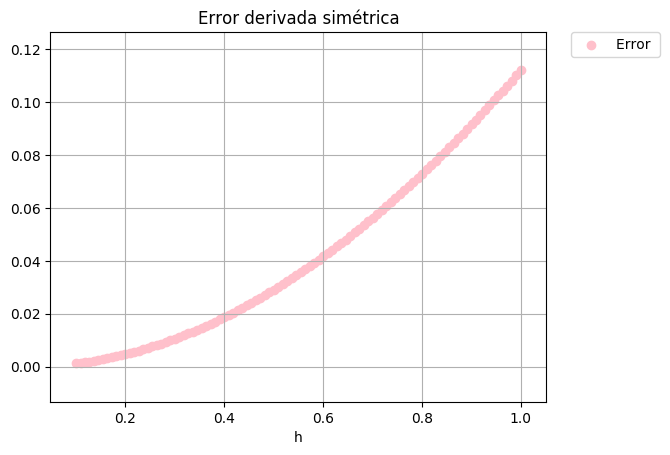

In [17]:
creadoradeyl(x->cos(x),pi/4)


Se usa una función que nos permita ver la convergencia de la derivada y el error.

In [18]:
function creadoradeyl2(f::Function,x0)
    yk=[]
   
    g=0.0 
    xk=[]
   hs=linspace(0.01,1,100)
   der=[]
    d=0.0
    vr=[]
    for i in 1:100
        h=hs[i]
       h2=1/h
        push!(vr,-0.7071067811865475)
         g=derivadasimetricavsreal(f,x0,h)
        d=derivadasimetrica(f,x0,h)
        push!(yk,g)
        push!(xk,h2)
        push!(der,d)
    end
   df= dif(f)(0.5)
   plt.grid()
 
    plt.scatter(xk,der,color = "violet",label = "Derivada ")
plt.xlabel("1/h")
      plt.plot(vr,color="red",label="Valor real derivada") 
    plt.title("Connvergencia de derivada y error")
    plt.scatter(xk,yk,color = "pink",label = "Error")
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    plt.show()
    plt.plot(df, color="red")
end

creadoradeyl2 (generic function with 1 method)

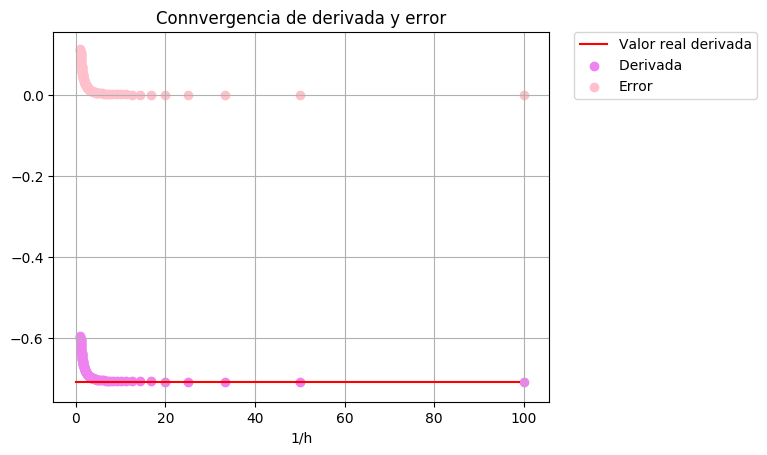

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe3e31502d0>

In [19]:
creadoradeyl2(x->cos(x),pi/4)

### Ejercicio 5
Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente: $$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

### Solución
$\Delta_h$ es un operador lineal.
#### Demostración
Sean $f(x)$, $g(x)$ funciones derivables, y $ \gamma$ una constante, 
$$\Delta_{h} (\gamma f(x) +g(x)) =\sum_{n = 1}^{\infty} \frac{h^n}{n!} \frac{d^n}{dx^n} (\gamma f(x) +g(x))$$.
Como la derivada es un operador lineal y tambien la suma 
$$\Delta_{h} (\gamma f(x) +g(x)) = \sum_{n = 1}^{\infty} \frac{h^n}{n!}\left[\gamma \frac{d^n f(x)}{dx^n} +\frac{d^n g(x)}{dx^n}\right]$$
$$\Delta_{h} (\gamma f(x) +g(x))= \gamma\sum_{n = 1}^{\infty} \frac{h^n}{n!}\frac{d^n f}{dx^n} +\sum_{n = 1}^{\infty} \frac{h^n}{n!} \frac{d^n g}{dx^n}$$
por lo tanto queda demostrada la linealidad del operador. 
#### QED

Con esto podemos cancelar de ambos lados la $f(x)$
$$\Delta_h f(x)=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} f(x) $$
entonces 
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$.


### Ejercicio 6
Para saber como se relaciona el operador derivada exacta con el operador diferencia finita hacia adelante es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma: $$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.

### Solución 
El operador queda definido
$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$, se observa cierta similitud con la serie de Taylor de $e^x$ en el origen,
$$e^x = \sum_{n = 0}^{\infty} \frac{x^n}{n!}$$
si se sustituye como argumento $h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}$, y sumando un cero se obtiene
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}+1-1=\sum_{n=0}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}-1=e^\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)-1$$
y por lo tanto podriamos obtener el operador derivada, $\begin{eqnarray} \left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}&=&\frac{1}{h}\log\left(1+\Delta_h\right)\ &=&\frac{1}{h}\left( \Delta_h-\frac{1}{2}\Delta^2_h +\dots\right). \end{eqnarray}$